In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
### datasciencetools.py
# this is a module developed by Matthew Oberhardt to analyze
# and visualize data.

import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import sys
from numpy import nan
import seaborn as sns
import datetime
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from contextlib import contextmanager
import scipy as sp
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

# sklearn imports:
from sklearn import linear_model
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples
import sklearn.preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV


In [2]:
breastdata = pd.read_csv("breastcancer.csv")

In [4]:
breastdata.head() #http://www.stat.yale.edu/~pollard/Courses/230.spring03/WBC/breastcancer.data

,group,id,diagnosis,thickness,size.unif,shape.unif,adhesion,epi,bare,bland,normal,mitoses
0,1,1000025,2,5,1,1,1,2,1,3,1,1
1,1,1002945,2,5,4,4,5,7,10,3,2,1
2,1,1015425,2,3,1,1,1,2,2,3,1,1
3,1,1016277,2,6,8,8,1,3,4,3,7,1
4,1,1017023,2,4,1,1,3,2,1,3,1,1


In [5]:
breastdatafiltered=breastdata.loc[:,'thickness':'mitoses']
#to look at potentially correlated features, plot features against each other 
#and remove, features such as diagnosis and group id


In [15]:
breastdatafiltered.head()

,thickness,size.unif,shape.unif,adhesion,epi,bare,bland,normal,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


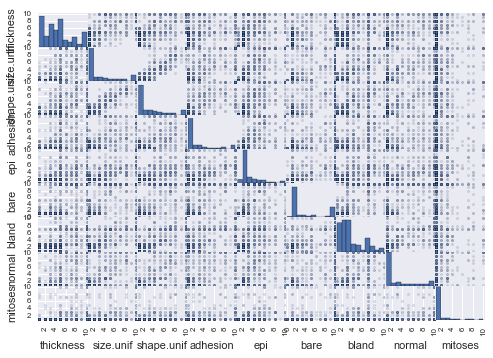

In [16]:
#look for correlations between features
plt.figure(figsize=(20,40))

axes = pd.tools.plotting.scatter_matrix(breastdatafiltered, alpha=0.2)

#uniformity of size and cell shape are highly correlated. 

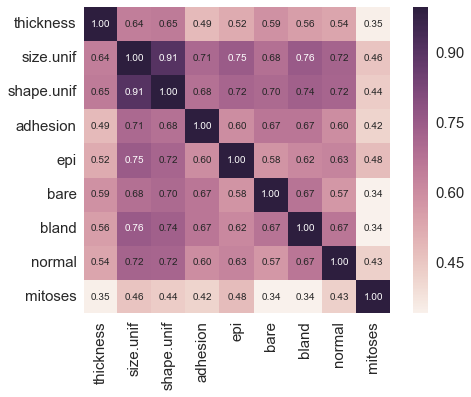

In [17]:
#correlation matrix showing above with numbers.
cols=['thickness', 'size.unif', 'shape.unif', 'adhesion', 'epi', 'bare','bland','normal', 'mitoses']
cm=np.corrcoef(breastdatafiltered.values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm, cbar=True,annot=True,square=True, fmt='.2f', yticklabels=cols, xticklabels=cols)

In [18]:
breastdata[breastdata.duplicated('id',keep=False)].sort(['id'])#look at duplicates for ids to see changes in individuals

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,group,id,diagnosis,thickness,size.unif,shape.unif,adhesion,epi,bare,bland,normal,mitoses
267,1,320675,4,3,3,5,2,3,10,7,1,1
272,1,320675,4,3,3,5,2,3,10,7,1,1
575,6,385103,2,5,1,2,1,2,1,3,1,1
269,1,385103,2,1,1,1,1,2,1,3,1,1
271,1,411453,2,5,1,1,1,2,1,3,1,1
607,7,411453,2,1,1,1,1,2,1,1,1,1
684,8,466906,2,1,1,1,1,2,1,1,1,1
683,8,466906,2,1,1,1,1,2,1,1,1,1
371,2,493452,2,1,1,3,1,2,1,1,1,1
372,2,493452,2,4,1,2,1,2,1,2,1,1


In [ ]:
#separate by benign and malignant to look at distributions of each feature in each

In [19]:
breastdata = pd.read_csv("breastcancer.csv")

breastdatafiltered = breastdata[breastdata.columns[2:]] #remove ID and group columns


In [20]:
datamalignant = breastdatafiltered.loc[breastdata['diagnosis'] == 4]

In [21]:
databenign = breastdatafiltered.loc[breastdata['diagnosis'] == 2]

In [ ]:
#separate by benign and malignant

In [ ]:
#look at spread of data for each characteristic by malignant or benign

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111733e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111c69bd0>]], dtype=object)

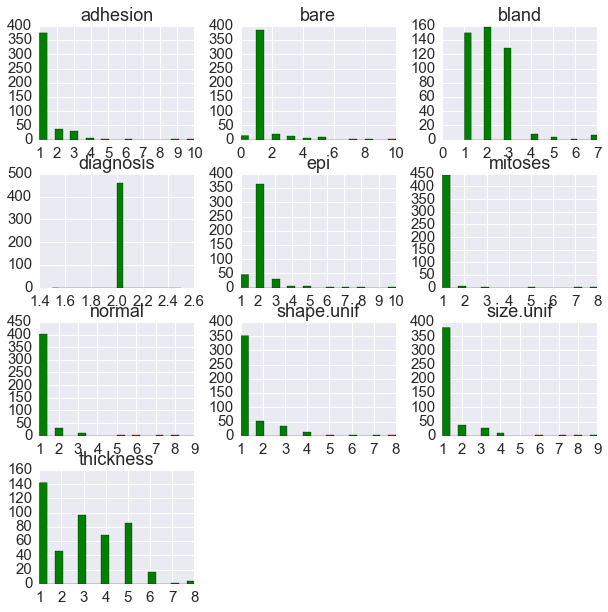

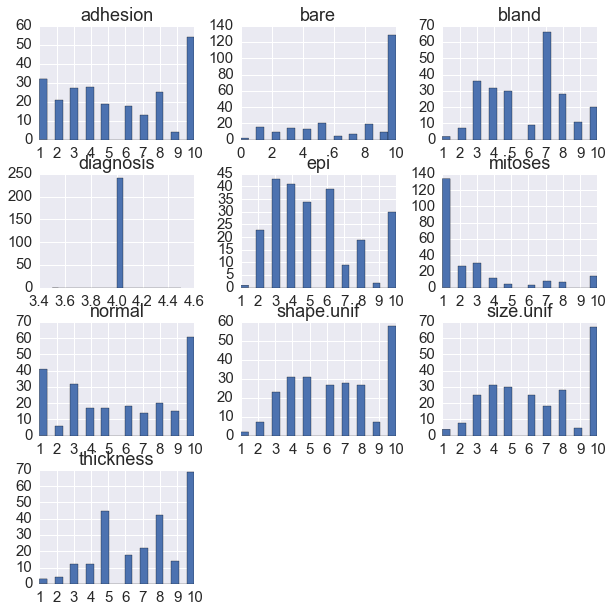

In [22]:
databenign.hist(color='g', bins=20, figsize=(10, 10))
datamalignant.hist(bins=20, figsize=(10, 10))


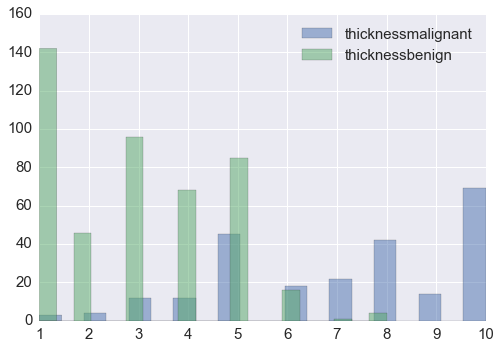

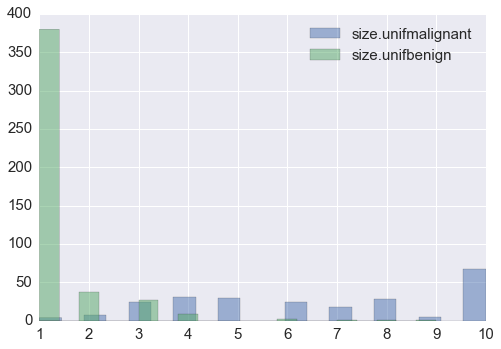

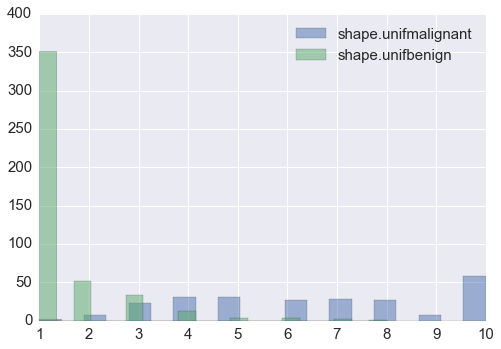

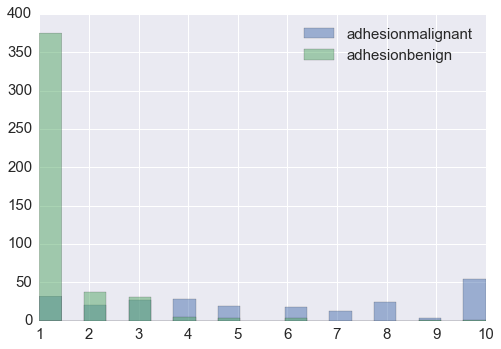

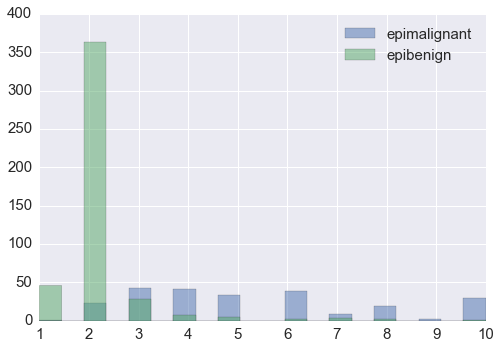

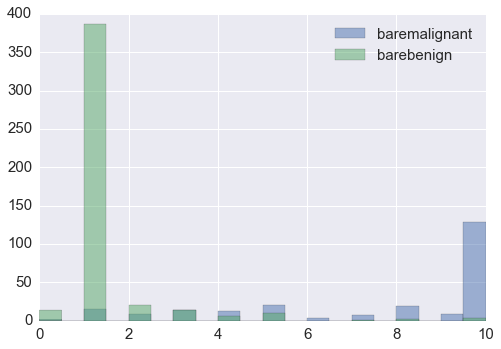

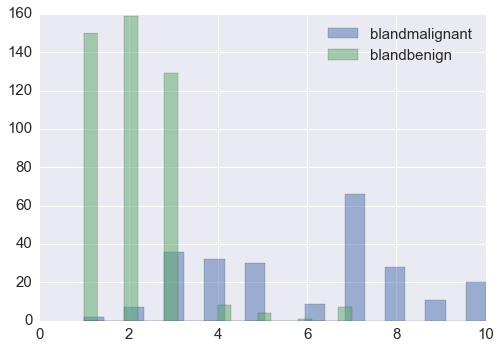

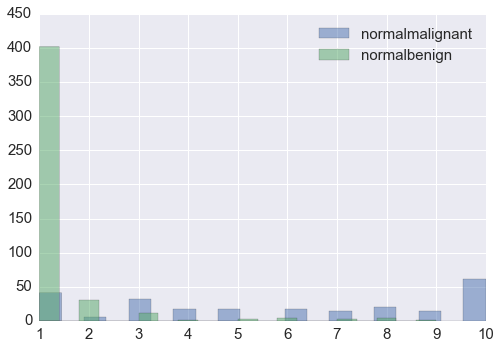

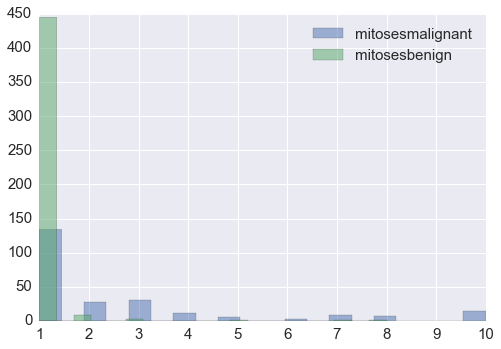

In [23]:
#this is just to look at each feature for benign and malignant overlayed
plt.figure() 
cols=['thickness', 'size.unif', 'shape.unif', 'adhesion', 'epi', 'bare','bland','normal', 'mitoses']
for i in cols:
    plt.hist(datamalignant[i], bins=20, alpha=0.5, label=i+'malignant')
    plt.hist(databenign[i], bins=20, alpha=0.5, label=i+'benign')
    plt.legend(loc='upper right')
    plt.show()
#datamalignant.hist(bins=20, figsize=(10, 10))
#databenign.hist(color='g', bins=20, figsize=(10, 10))


In [ ]:
#want to be able to classify new data as benign or malignant

In [4]:
#try logistic regression,  not a giant data set, multiple features

In [24]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [25]:
breastdata = pd.read_csv("breastcancer.csv")

In [65]:
breastdata.loc[breastdata['diagnosis']==4, 'diagnosis'] = 1
breastdata.loc[breastdata['diagnosis']==2, 'diagnosis'] = 0

In [ ]:
#remove unnecessary columns (ID and group and diagnosis)

In [66]:
X = breastdata[breastdata.columns[3:]] #these are the features

In [67]:
Y =breastdata['diagnosis'] #this is the outcome/classifier

In [68]:
logreg = linear_model.LogisticRegression()

In [69]:
from sklearn import cross_validation #build a test and training set

In [85]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)

In [71]:
logreg.fit(X_train, y_train) #fit the data to training values 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
ypredict= logreg.predict_proba(X_test)

In [102]:
accuracy_score(y_test,ypredict) #looks pretty accurate


ValueError: Can't handle mix of binary and continuous-multioutput

In [74]:
print(classification_report(y_test, ypredict)) #mostly don't want to have false negative

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       180
          1       0.91      0.94      0.93       100

avg / total       0.95      0.95      0.95       280



In [75]:
index=X.columns
len(index)

9

In [76]:
logreg.coef_[0]


array([ 0.20280373,  0.24151616,  0.15106744,  0.26566998, -0.0423138 ,
        0.4168535 ,  0.12903277,  0.19367751,  0.20542049])

In [77]:
#credit for this function to https://github.com/mattoby/datasciencetools
def plot_feature_importances(X_names, importances, Nfeatures=9):
    '''
    Need to fix this code..
    Builds barplot of feature importances for random forest.
    model should be a randomForest model, already trained.
    X_names are the names of the features (np array)
    importances = model.feature_importances_ for random forest
    importances = model.get_params() for logistic regression
    Nfeatures = # features to plot (default is all of them)
    '''

    # get nice feature names for plot:
#    if useFeatureNames:
#        fnames = feature_names(X_names)
#    else:
#        fnames = X_names
    fnames = X_names

    # optionally, take only the top features:
    indices = np.argsort(importances)#[::-1]
    if Nfeatures < len(indices):
        indices = indices[-Nfeatures:]

    fnames_plot = fnames[indices]
    imps_plot = importances[indices]

    plt.figure(figsize=(3, 7))
    plt.title('Feature importances')
    plt.barh(range(len(imps_plot)), imps_plot, align='center', )
    plt.ylim([-1, len(fnames_plot)])
    plt.yticks(range(len(fnames_plot)), fnames_plot)
#    plt.barh(range(len(fnames)), importances[indices], align='center', )
#    plt.ylim([-1, len(fnames)])
#    plt.yticks(range(len(fnames)), fnames[indices])
    plt.xticks(rotation=90)
#    for f in range(features):
#        print ("%2d) %-*s %f" % (f+1, 30, features[f], importances[indices[f]]))

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

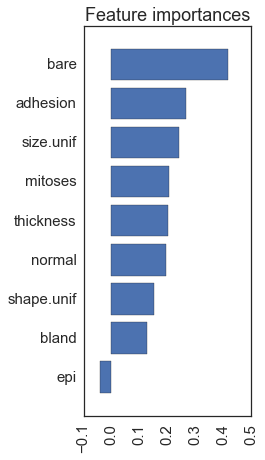

In [78]:
plot_feature_importances(X.columns, logreg.coef_[0], Nfeatures=9)

In [79]:
#credit for this function to https://github.com/mattoby/datasciencetools
def plot_roc_curve(y_true, y_predictedprobs, startNewPlot=True, withLabel=True):
    '''
    Plots an roc curve.
    For random forest:
    y_predictedprobs = model.predict_proba(X_test)[:,1]
    '''

    # set style:
    sns.set(style="white", color_codes=True, font_scale=1.5)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_predictedprobs)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    if startNewPlot:
        plt.figure()


    # Plot of a ROC curve for a specific class
    if withLabel:
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    else:
        plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    err = 0.01
    plt.xlim([-err, 1])
    plt.ylim([0.0, 1+err])
    plt.axes().set_aspect('equal')
#    plt.show()

    # return to default (this is a hack..)
    sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

    return fpr, tpr, thresholds


In [103]:
logreg.predict_proba(X_test)

array([[  9.68234440e-01,   3.17655597e-02],
       [  9.54633028e-01,   4.53669722e-02],
       [  7.80201101e-02,   9.21979890e-01],
       [  9.54463926e-01,   4.55360740e-02],
       [  1.20771818e-03,   9.98792282e-01],
       [  9.76239907e-01,   2.37600932e-02],
       [  3.02375504e-03,   9.96976245e-01],
       [  9.76239907e-01,   2.37600932e-02],
       [  1.86346465e-03,   9.98136535e-01],
       [  6.84524766e-01,   3.15475234e-01],
       [  9.82834471e-01,   1.71655294e-02],
       [  9.77488555e-01,   2.25114448e-02],
       [  4.73151723e-03,   9.95268483e-01],
       [  1.20348506e-01,   8.79651494e-01],
       [  1.14907266e-02,   9.88509273e-01],
       [  9.76239907e-01,   2.37600932e-02],
       [  9.74549260e-01,   2.54507401e-02],
       [  5.52270169e-03,   9.94477298e-01],
       [  4.68540576e-02,   9.53145942e-01],
       [  9.68905202e-01,   3.10947977e-02],
       [  4.15986161e-03,   9.95840138e-01],
       [  7.97370871e-04,   9.99202629e-01],
       [  

(array([ 0.        ,  0.        ,  0.00555556,  0.00555556,  0.01111111,
         0.01111111,  0.01666667,  0.01666667,  0.02222222,  0.02222222,
         0.02777778,  0.02777778,  0.02777778,  0.02777778,  0.04444444,
         0.04444444,  0.05      ,  0.05      ,  0.05555556,  0.05555556,
         0.06111111,  0.06111111,  0.06666667,  0.06666667,  0.07222222,
         0.07222222,  0.17222222,  0.18333333,  0.22222222,  0.23888889,
         0.27222222,  0.28333333,  0.3       ,  0.30555556,  0.31666667,
         0.34444444,  0.36666667,  0.39444444,  0.42777778,  0.45      ,
         0.46666667,  0.49444444,  0.51666667,  0.52222222,  0.53888889,
         0.56111111,  0.56666667,  0.57777778,  0.58333333,  0.59444444,
         0.60555556,  0.63333333,  0.64444444,  0.66111111,  0.68888889,
         0.69444444,  0.73333333,  0.74444444,  0.75      ,  0.77222222,
         0.79444444,  0.85      ,  0.86111111,  0.88888889,  0.9       ,
         0.95      ,  0.96111111,  0.99444444,  1. 

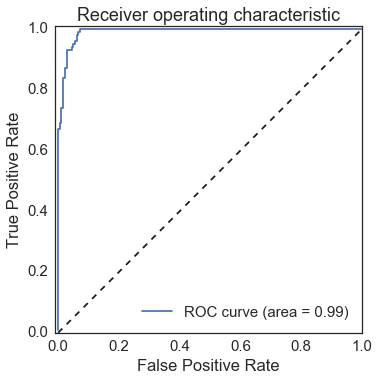

In [105]:
plot_roc_curve(np.array(y_test), logreg.predict_proba(X_test)[:, 1])  

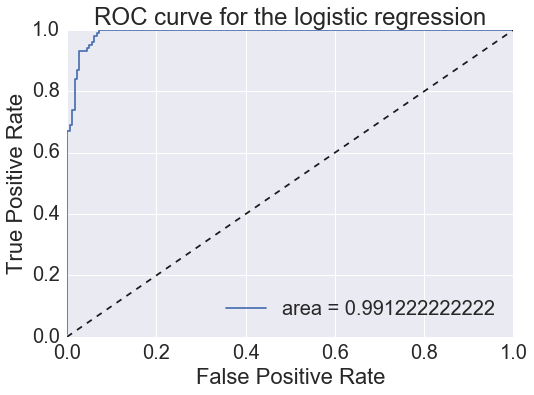

In [106]:
from sklearn import svm, metrics, grid_search, linear_model, datasets
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), 
                                         logreg.predict_proba(X_test)[:, 1])
sns.set(font_scale=2)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='area = %s' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the logistic regression')
plt.show()

In [83]:
cls = linear_model.LogisticRegression()

In [ ]:
gslr = grid_search.GridSearchCV(cls, param_grid= {'penalty': ['11','12']},
                                scoring = 'accuracy', 
                                cv=10).fit(X_train, y_train)

In [392]:
from sklearn.metrics import confusion_matrix

In [402]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print confmat

[[172   8]
 [  5  95]]


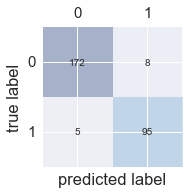

In [406]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 
#I told 5 people they did not have cancer when they actually did, and 8 people they had cancer when they actually didn't

In [112]:
from sklearn.decomposition import PCA
#repeat above but use PCA to see if we can remove components that may be highly correlated with other features and 
#just retain components that account for most of the variability. 

In [351]:
from sklearn.pipeline import Pipeline

In [353]:
breastdata = pd.read_csv("breastcancer.csv")

In [354]:
Y=breastdata['diagnosis'].values 

In [355]:
X = breastdata[breastdata.columns[3:]] 

In [356]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)

In [357]:
pca=PCA(n_components=None) #this retains all components

In [358]:
X_train_pca=pca.fit_transform(X_train)

In [359]:
pca.explained_variance_ratio_ #67% of variation explained by the first principal component

array([ 0.67525632,  0.0784196 ,  0.06192062,  0.05010023,  0.0392746 ,
        0.03569121,  0.02655363,  0.02035415,  0.01242965])

In [360]:
pipe_lr=Pipeline([('pca',PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))]) 
#could include all principal components since its a small dataset, but just kept first two

In [361]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(copy=True, n_components=2, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [391]:
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.954


In [363]:
ypredict= logreg.predict(X_test)

In [364]:
print(classification_report(y_test, ypredict))
#really do not want to have false negatives and misdiagnose people with cancer as benign. want to maximize recall in this case.
#f1 score considers precision and recall


             precision    recall  f1-score   support

          2       0.97      0.95      0.96       180
          4       0.91      0.94      0.93       100

avg / total       0.95      0.95      0.95       280



In [ ]:
#try random forest and svm if had more time

In [293]:
from sklearn.ensemble import RandomForestRegressor

In [294]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1,n_jobs=-1)

In [295]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [296]:
y_train_pred = forest.predict(X_train)